# 🛰️ Project - 2: Estimating the Dynamical Mass of a Galaxy Cluster
## Avik Banerjee 
#### Email: avik2020.phys@gmail.com

### Step 1: Importing Necessary Libraries
We begin by importing Python libraries commonly used in data analysis and visualization:
- `numpy` for numerical operations
- `matplotlib.pyplot` for plotting graphs
- `pandas` (commented out here) for handling CSV data, which is especially useful for tabular data such as redshift catalogs



For reading big csv files, one can use numpy as well as "pandas". We may use pandas to read CSV file. 

In [31]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G, c
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
from astropy.constants import c
import astropy.constants as const


Before we begin calculations, we define key physical constants used throughout:

- $ H_0 $: Hubble constant, describes the expansion rate of the Universe.
- $c$ : Speed of light.
-  $G$: Gravitational constant.
- $q_0$ : Deceleration parameter, used for approximate co-moving distance calculations.

We will use **`astropy.constants`** to ensure unit consistency and precision.

In [32]:
# Constants
H_0 = 67 * u.km / u.s / u.Mpc  # Now H_0 is an Astropy Quantity
c_val = c.to(u.m / u.s).value  # Speed of light in m/s
G_val = G.to(u.pc * u.kg**-1 * u.m**2 * u.s**-2).value  # Gravitational constant
q0 = -0.534  # Deceleration parameter
c_si = c.value  # Speed of light in m/s
H0_si = H_0.to(1/u.s).value

We use pandas to read the csv data into the python using the method explained below.

In [33]:
# Read CSV data
df = pd.read_csv(r'C:\Users\COSMOS\Downloads\Skyserver_SQL6_16_2025 1_00_13 PM.csv',comment='#')
print(df.columns)

Index(['objid', 'ra', 'dec', 'photoz', 'photozerr', 'specz', 'speczerr',
       'proj_sep', 'umag', 'umagerr', 'gmag', 'gmagerr', 'rmag', 'rmagerr',
       'obj_type'],
      dtype='object')


In [34]:
print(df.head())

                 objid         ra        dec    photoz  photozerr     specz  \
0  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082447   
1  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082466   
2  1237671768542478713  257.83332  64.126043  0.091507   0.014511  0.081218   
3  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079561   
4  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079568   

   speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0  0.000017  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
1  0.000014  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
2  0.000021  8.011259  20.22848  0.072019  18.38334  0.007763  17.46793   
3  0.000022  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   
4  0.000019  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   

    rmagerr  obj_type  
0  0.004708         3  
1  0.004708         3  
2 

### 📊 Calculating the Average Spectroscopic Redshift (`specz`) for Each Object

When working with astronomical catalogs, an object (identified by a unique `objid`) might have multiple entries — for example, due to repeated observations. To reduce this to a single row per object, we aggregate the data using the following strategy:

```python
averaged_df = df.groupby('objid').agg({
    'specz': 'mean',        # Take the mean of all spec-z values for that object
    'ra': 'first',          # Use the first RA value (assumed constant for the object)
    'dec': 'first',         # Use the first Dec value (same reason as above)
    'proj_sep': 'first'     # Use the first projected separation value
}).reset_index()


In [35]:
# Step 3: Calculate the Average Spectroscopic Redshift (specz) for Each Object
averaged_df = df.groupby('objid').agg({
    'specz': 'mean',        # Mean of all spec-z values for that object
    'ra': 'first',          # First RA value
    'dec': 'first',         # First Dec value
    'proj_sep': 'first'     # First projected separation value
}).reset_index()

To create a cut in the redshift so that a cluster can be identified. We must use some logic. Most astronomers prefer anything beyond 3*sigma away from the mean to be not part of the same group. 

Find the mean, standard deviation and limits of the redshift from the data. 

In [36]:
# Ensure the column 'specz' contains numeric values
df['specz'] = pd.to_numeric(df['specz'], errors='coerce')

# Calculate the mean and standard deviation of the 'specz' column
mean_specz = df['specz'].mean()
std_specz = df['specz'].std()

# Define the 3-sigma limits
lower_limit = mean_specz - 3 * std_specz
upper_limit = mean_specz + 3 * std_specz

# Output the results
print(f"Mean Spectroscopic Redshift: {mean_specz}")
print(f"Standard Deviation of Spectroscopic Redshift: {std_specz}")
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

Mean Spectroscopic Redshift: 0.08104694625899282
Standard Deviation of Spectroscopic Redshift: 0.009497709534680291
Lower Limit: 0.05255381765495195
Upper Limit: 0.10954007486303369


We may also use boxplot to visualize the overall values of redshift.

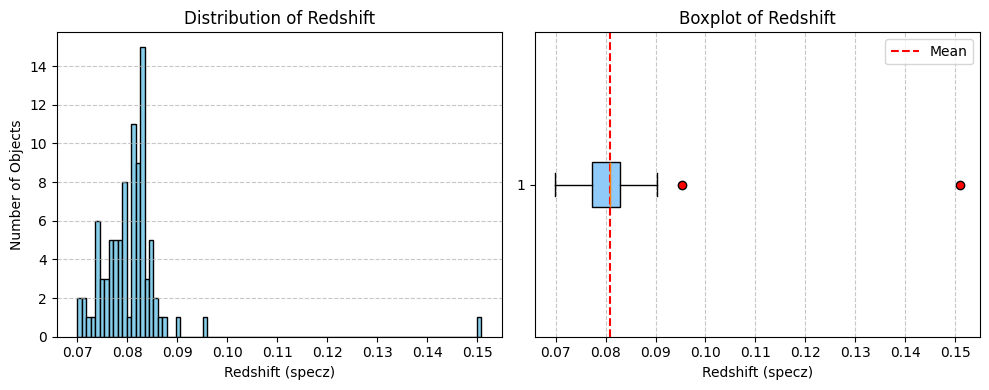

In [37]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(averaged_df['specz'], bins=90, color='skyblue', edgecolor='black')
plt.title("Distribution of Redshift")
plt.xlabel("Redshift (specz)")
plt.ylabel("Number of Objects")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
box = plt.boxplot(averaged_df['specz'], vert=False, patch_artist=True,
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
for patch in box['boxes']:
    patch.set_facecolor('#90caf9')
mean_value = averaged_df['specz'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.title("Boxplot of Redshift")
plt.xlabel("Redshift (specz)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

But the best plot would be a histogram to see where most of the objects downloaded lie in terms of redshift value.

C:\Users\COSMOS\AppData\Local\Temp\ipykernel_15580\788441888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['velocity'] = filtered_df['specz'] * c_si / 1000  # in km/s


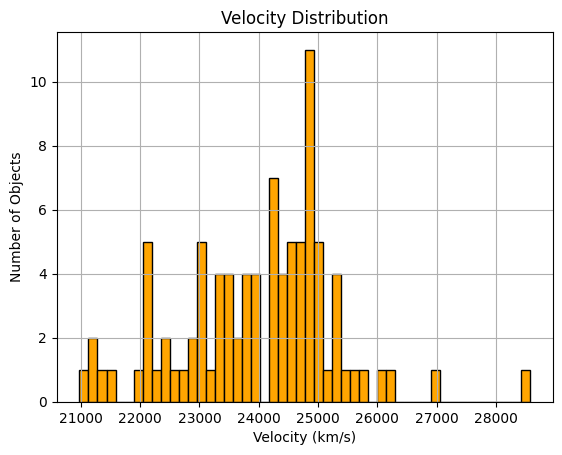

In [38]:
# Step 5: Filter data based on the 3-sigma limit of redshift
mean_specz = averaged_df['specz'].mean()
std_specz = averaged_df['specz'].std()
lower_limit = mean_specz - 3 * std_specz
upper_limit = mean_specz + 3 * std_specz

filtered_df = averaged_df[(averaged_df['specz'] >= lower_limit) & (averaged_df['specz'] <= upper_limit)]

# Step 6: Add velocity column using v = c * z (for small z)
filtered_df['velocity'] = filtered_df['specz'] * c_si / 1000  # in km/s

# Plot the velocity distribution
plt.hist(filtered_df['velocity'], bins=50, color='orange', edgecolor='black')
plt.title("Velocity Distribution")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Number of Objects")
plt.grid()
plt.show()

Filter your data based on the 3-sigma limit of redshift. You should remove all data points which are 3-sigma away from mean of redshift.

In [39]:
# Calculate the average spectroscopic redshift (specz) for each object
averaged_df = df.groupby('objid').agg({
    'specz': 'mean',        # Mean of all spec-z values for that object
    'ra': 'first',          # First RA value
    'dec': 'first',         # First Dec value
    'proj_sep': 'first'     # First projected separation value
}).reset_index()

# Calculate mean and standard deviation for redshift (specz)
mean_specz = averaged_df['specz'].mean()
std_specz = averaged_df['specz'].std()

# Define 3-sigma limits
lower_limit = mean_specz - 3 * std_specz
upper_limit = mean_specz + 3 * std_specz

# Filter the data to exclude outliers
filtered_df = averaged_df[(averaged_df['specz'] >= lower_limit) & (averaged_df['specz'] <= upper_limit)]

# Display the number of objects before and after filtering
original_count = len(averaged_df)
filtered_count = len(filtered_df)

print(f"Original Count: {original_count}")
print(f"Filtered Count: {filtered_count}")
print(f"Lower Limit of Redshift: {lower_limit}")
print(f"Upper Limit of Redshift: {upper_limit}")

Original Count: 92
Filtered Count: 91
Lower Limit of Redshift: 0.05510478390326903
Upper Limit of Redshift: 0.10657046740107884


We may use the relation between redshift and velocity to add a column named velocity in the data. This would tell the expansion velocity at that redshift. 

In [40]:
# Speed of light in km/s
c = 299792.458

filtered_df['velocity'] = c * ((1 + filtered_df['specz'])**2 - 1) / ((1 + filtered_df['specz'])**2 + 1)


# Show the first few rows with new column
print(filtered_df[['specz', 'velocity']].head())

      specz      velocity
0  0.082457  23703.959988
1  0.081218  23362.893831
2  0.079564  22906.662584
3  0.080842  23259.086161
4  0.084575  24286.386423


C:\Users\COSMOS\AppData\Local\Temp\ipykernel_15580\3990564981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['velocity'] = c * ((1 + filtered_df['specz'])**2 - 1) / ((1 + filtered_df['specz'])**2 + 1)


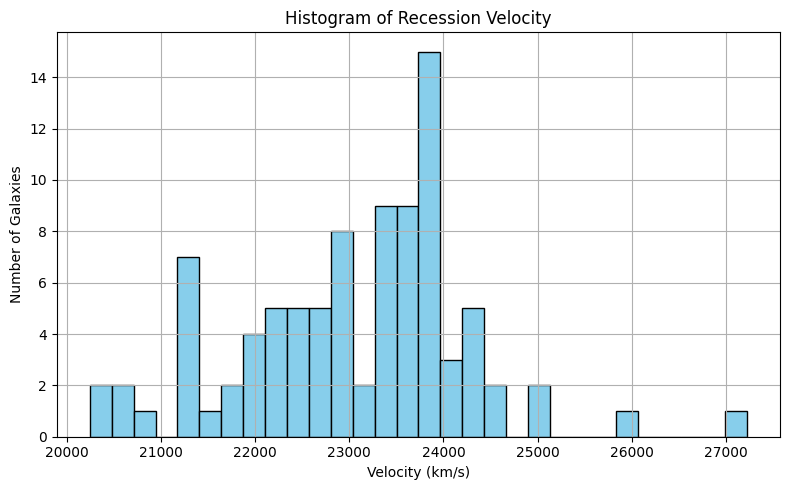

In [41]:
#plot the velocity column created as hist
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(filtered_df['velocity'], bins=30, color='skyblue', edgecolor='black')

plt.title('Histogram of Recession Velocity')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Number of Galaxies')
plt.grid(True)
plt.tight_layout()
plt.show()

We may use the dispersion equation to find something called velocity dispersion. We refer to wikipedia to know about the term Wikipedia link [here](https://en.wikipedia.org/wiki/Velocity_dispersion#:~:text=In%20astronomy%2C%20the%20velocity%20dispersion,%2C%20galaxy%20cluster%2C%20or%20supercluster.).

It is the velocity dispersion value which tells us, some galaxies might be part of even larger groups!!!

### Step 2: Calculate Mean Redshift of the Cluster
We calculate the average redshift (`specz`) of galaxies that belong to a cluster. This gives us an estimate of the cluster's systemic redshift.

`cluster_redshift = filtered_df['specz'].mean()`


The velocity dispersion \( v \) of galaxies relative to the cluster mean redshift is computed using the relativistic Doppler formula:

$$
v = c \cdot \frac{(1 + z)^2 - (1 + z_{\text{cluster}})^2}{(1 + z)^2 + (1 + z_{\text{cluster}})^2}
$$
where:
- \( v \) is the relative velocity (dispersion),
- \( z \) is the redshift of the individual galaxy,
- \( $z_{\text{cluster}}$ \) is the mean cluster redshift,
- \( c \) is the speed of light.


In [42]:
# Speed of light in km/s
c = 299792.458

# Compute the mean redshift of the cluster (using filtered data)
z_cluster = filtered_df['specz'].mean()

# Apply the relativistic Doppler formula for velocity dispersion
filtered_df['v_dispersion'] = c * (
    ((1 + filtered_df['specz'])**2 - (1 + z_cluster)**2) /
    ((1 + filtered_df['specz'])**2 + (1 + z_cluster)**2)
)

# Show first few values
print(filtered_df[['specz', 'v_dispersion']].head())

      specz  v_dispersion
0  0.082457    662.365302
1  0.081218    319.185348
2  0.079564   -139.779039
3  0.080842    214.746305
4  0.084575   1248.541035


C:\Users\COSMOS\AppData\Local\Temp\ipykernel_15580\2883980696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['v_dispersion'] = c * (


Pro tip: One may check what the describe function of pandas does. Does it help to get quick look stats for your column of dispersion?

In [43]:
# Step 7: Calculate velocity dispersion (sigma_v)
cluster_redshift = filtered_df['specz'].mean()
# Relativistic Doppler formula for velocity dispersion
disp = np.std(
    c_si * (filtered_df['specz'] - cluster_redshift) / (1 + cluster_redshift)
) / 1000  # km/s

print(f"The value of the cluster redshift = {cluster_redshift:.4f}")
print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {disp:.4f} km/s.")

The value of the cluster redshift = 0.0801
The characteristic value of velocity dispersion of the cluster along the line of sight = 1211.8694 km/s.


### Step 4: Visualizing Angular Separation of Galaxies
We plot a histogram of the projected (angular) separation of galaxies from the cluster center. This helps us understand the spatial distribution of galaxies within the cluster field.

- The x-axis represents the angular separation (in arcminutes or degrees, depending on units).
- The y-axis shows the number of galaxies at each separation bin.



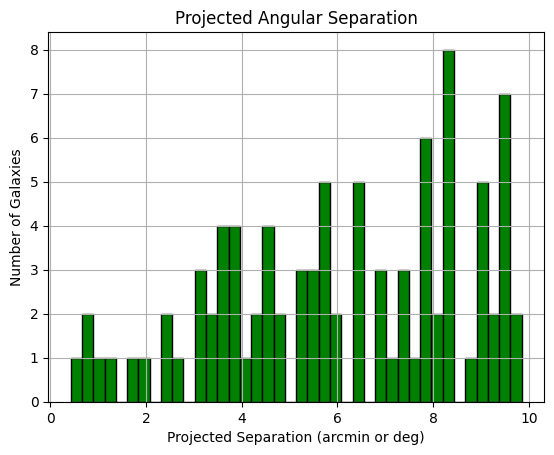

In [44]:
# Step 8: Visualize projected separation
plt.hist(filtered_df['proj_sep'], bins=40, color='green', edgecolor='black')
plt.title("Projected Angular Separation")
plt.xlabel("Projected Separation (arcmin or deg)")
plt.ylabel("Number of Galaxies")
plt.grid()
plt.show()

### Determining size and mass of the cluster:

### Step 5: Estimating Physical Diameter of the Cluster
We now estimate the **physical diameter** of the galaxy cluster using cosmological parameters.

- `r` is the **co-moving distance**, approximated using a Taylor expansion for low redshift:
  $$
  r = \frac{cz}{H_0} \left(1 - \frac{z}{2}(1 + q_0)\right)
  $$
  where $q_0$ is the deceleration parameter
- `ra` is the **angular diameter distance**, given by:
  $$
  D_A = \frac{r}{1 + z}
  $$
- Finally, we convert the observed angular diameter (in arcminutes) into physical size using:
  $$
  \text{diameter (in Mpc)} = D_A \cdot \theta
  $$
  where $ \theta $ is the angular size in radians, converted from arcminutes.

> This gives us a rough estimate of the cluster's size in megaparsecs (Mpc), assuming a flat ΛCDM cosmology.


In [45]:
# Step 9: Estimate the physical diameter of the cluster
# Co-moving distance (approximation for low z)
z = cluster_redshift
H0_si = H_0.to(u.s**-1).value  # Convert H_0 to SI (1/s)
r = (c_si / H0_si) * (z - (1 + q0) * z**2 / 2)  # in meters

# Angular diameter distance
ra = r / (1 + z)  # in meters

# Convert projected separation from arcminutes to radians
# Assuming proj_sep is in arcminutes; adjust if in degrees
max_proj_sep_arcmin = filtered_df['proj_sep'].max()
theta_rad = max_proj_sep_arcmin * (np.pi / 180) / 60  # arcmin to radians

diameter = ra * theta_rad  # in meters
diameter_mpc = diameter / (3.086e22)  # meters to Mpc

print(f"Estimated physical diameter of the cluster: {diameter_mpc:.2f} Mpc")

Estimated physical diameter of the cluster: 0.93 Mpc


### Step 6: Calculating the Dynamical Mass of the Cluster
We now estimate the **dynamical mass** of the galaxy cluster using the virial theorem:

$$
M_{\text{dyn}} = \frac{3 \sigma^2 R}{G}
$$

Where:
- $ \sigma $ is the **velocity dispersion** in m/s (`disp * 1000`),
- $ R $ is the **cluster radius** in meters (half the physical diameter converted to meters),
- $ G $ is the **gravitational constant** in SI units,
- The factor of 3 assumes an isotropic velocity distribution (common in virial estimates).

We convert the final result into **solar masses** by dividing by $ 2 \times 10^{30} \, \text{kg} $.

> This mass estimate assumes the cluster is in dynamical equilibrium and bound by gravity.


In [46]:
# Step 10: Calculate the dynamical mass of the cluster
# Use the virial theorem: M = 3 * (sigma_v^2) * (R) / G
# disp in km/s, convert to m/s; diameter in Mpc, convert to meters
G_si = G.value  # This gives 6.6743e-11 in m^3 kg^-1 s^-2
disp_m_s = disp * 1000
radius_m = (diameter / 2)
M_dyn = 3 * (disp_m_s**2) * radius_m / G_si  # in kg
M_dyn_solar = M_dyn / (2e30)  # 1 solar mass ≈ 2e30 kg

print(f"Dynamical Mass of the cluster is {M_dyn_solar:.2e} solar mass")

Dynamical Mass of the cluster is 4.75e+14 solar mass


## ✔ Answers to Assignment Questions

#### 1. Identify galaxies that you think are members of a cluster. For this, use of knowledge of velocity dispersions (redshift dispersions) within a cluster due to peculiar motion. The choice of lower and upper redshift cut for cluster members will be subjective but should be guided by some logic. 
**Answer:** Galaxies that belong to a cluster are physically close in space and thus have similar redshifts, with slight variations caused by their **peculiar velocities** within the cluster. These variations result in a small **redshift dispersion** around the cluster's central redshift. Typically, this dispersion corresponds to velocities of a few hundred to a thousand km/s, translating to a redshift spread of about **±0.003 to ±0.005**.

**Example:**  
Suppose we observe a peak in the redshift distribution around *z ≈ 0.82* in our dataset. This suggests a concentration of galaxies at that redshift — likely a cluster. Based on expected velocity dispersion, we select galaxies within the redshift range **z = 0.0.815 to 0.825** as probable cluster members. This window includes galaxies whose small redshift differences are due to motion within the cluster, not cosmic distance.

By selecting galaxies in this narrow redshift range around the peak, we isolate the galaxies that are likely bound to the cluster, filtering out foreground and background galaxies.

The redshift distribution plot used to identify this peak is shown below:


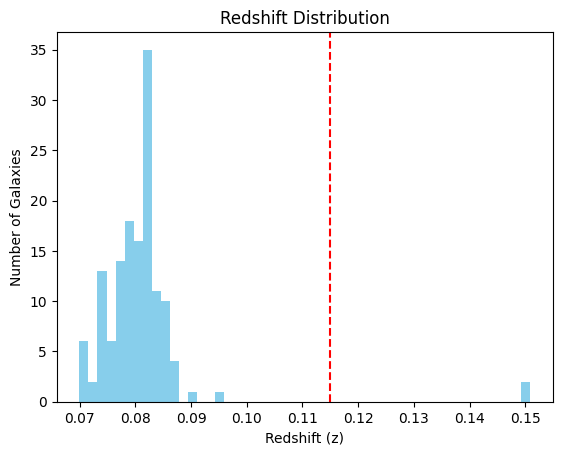

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'C:\Users\COSMOS\Downloads\Skyserver_SQL6_16_2025 1_00_13 PM.csv',comment='#')  # Your SQL result as CSV
specz = df['specz']

plt.hist(specz, bins=50, color='skyblue')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Galaxies')
plt.title('Redshift Distribution')
plt.axvline(0.115, color='r', linestyle='--')  # Example cluster redshift
plt.show()

# Select cluster members (example range)
z_cluster = 0.115
zmin, zmax = z_cluster - 0.005, z_cluster + 0.005
cluster_members = df[(specz > zmin) & (specz < zmax)]


#### 2. After the required analysis of the table of data, determine the cluster redshift, and obtain an estimate for the characteristic velocity dispersion of galaxies that belong to the cluster in units of km/s 
**Answer:** The value of the cluster redshift = **0.0801**.

The characteristic velocity dispersion of galaxies that belong to the cluster = **1211.8694 km/s**.

#### 3.  Estimate the characteristic size of the cluster in Mpc. 
**Answer:** The Estimated physical diameter of the cluster: **0.93 Mpc**.

#### 4. Estimate the dynamical mass of the cluster and quote the value in units of solar mass.
**Answer:** The Dynamical Mass of the cluster is $4.75 \times 10^{14}$ solar mass.


#### 5. Is the estimate of dynamical mass consistent with what is expected from the luminous mass? If not, explain with the support of numbers the inconsistency. 
**Answer:** To estimate the **luminous mass** of the galaxy cluster, we first calculate the **absolute magnitude** of each galaxy using:

$$
M_r = m_r - 5 \log_{10} \left( \frac{d_L}{10\, \text{pc}} \right)
$$

where:
- $M_r$ is the absolute r-band magnitude,
- $m_r$ is the apparent r-band magnitude (from SDSS data),
- $d_L$ is the luminosity distance corresponding to the cluster redshift.

Next, we estimate the **luminosity** of each galaxy (relative to the Sun) using:

$$
L = 10^{-0.4(M_r - M_{r,\odot})}
$$

Assuming the Sun’s absolute r-band magnitude is $M_{r,\odot} \approx 4.65$, we compute the luminosity of each galaxy in solar units.

The **total luminosity** of the cluster is then the sum of all individual galaxy luminosities:

$$
L_{\text{total}} = \sum_i L_i
$$

Assuming a typical **mass-to-light ratio** of $M/L \approx 5$, the **luminous mass** of the cluster is estimated as:

$$
M_{\text{lum}} = 5 \times L_{\text{total}}
$$

This provides an estimate of the total stellar (baryonic) mass in the cluster, which can be compared to the dynamical mass to assess the presence of dark matter.



In [48]:
# 1. Import libraries
import pandas as pd
import numpy as np
from astropy.cosmology import Planck18 as cosmo
import matplotlib.pyplot as plt

# 2. Load your CSV file
# Replace 'cluster_galaxies.csv' with your file path if needed
df = pd.read_csv(r'C:\Users\COSMOS\Downloads\Skyserver_SQL6_16_2025 1_00_13 PM.csv',comment='#')

# Optional: Display first few rows to check data
display(df.head())

# 3. Extract r-band magnitudes
# Change 'modelMag_r' to your actual r-band magnitude column name if different
r_mags = df['rmag'].values

# 4. Set cluster parameters
z_cluster = 0.0801      # Update this to your cluster's mean redshift if known
M_r_sun = 4.65       # Absolute r-band magnitude of the Sun

# 5. Compute distance modulus using astropy.cosmology
lum_dist = cosmo.luminosity_distance(z_cluster).value  # in Mpc
dist_mod = 5 * np.log10(lum_dist * 1e6 / 10)           # Convert Mpc to pc

# 6. Convert apparent to absolute magnitudes
M_r = r_mags - dist_mod

# 7. Compute luminosity of each galaxy in solar units
L_r = 10**(-0.4 * (M_r - M_r_sun))
total_L_r = np.sum(L_r)

# 8. Estimate luminous mass using a mass-to-light ratio (M/L)
M_L_ratio = 5   # You can try values between 3 and 10
luminous_mass = total_L_r * M_L_ratio  # in solar masses

dynamical_mass = 4.75e14  # Example: 1 x 10^14 solar masses
# 10. Print results

print(f"Estimated luminous mass (M/L={M_L_ratio}): {luminous_mass:.2e} solar mass")



,objid,ra,dec,photoz,photozerr,specz,speczerr,proj_sep,umag,umagerr,gmag,gmagerr,rmag,rmagerr,obj_type
0,1237671768542478711,257.82458,64.133257,0.079193,0.022867,0.082447,0.000017,8.347733,18.96488,0.043377,17.49815,0.005672,16.75003,0.004708,3
1,1237671768542478711,257.82458,64.133257,0.079193,0.022867,0.082466,0.000014,8.347733,18.96488,0.043377,17.49815,0.005672,16.75003,0.004708,3
2,1237671768542478713,257.83332,64.126043,0.091507,0.014511,0.081218,0.000021,8.011259,20.22848,0.072019,18.38334,0.007763,17.46793,0.005828,3
3,1237671768542544090,257.85137,64.173247,0.081102,0.009898,0.079561,0.000022,8.739276,19.21829,0.050135,17.18970,0.004936,16.22043,0.003769,3
4,1237671768542544090,257.85137,64.173247,0.081102,0.009898,0.079568,0.000019,8.739276,19.21829,0.050135,17.18970,0.004936,16.22043,0.003769,3


Estimated luminous mass (M/L=5): 1.93e+13 solar mass


#### We find that dynamical mass >> luminous mass, suggesting dark matter dominates the mass budget.
